# Correlação e Regressão Simples/Multivariada - Desafio Final


In [ ]:
import pandas as pd

# carregar o arquivo csv
file_path = 'car_price.csv'
file_path = 'kc_house_data.csv'
dados = pd.read_csv(file_path)

# Visualizando as primeiras linhas dos dados para entender a estrutura
dados.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quandoconsideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?**


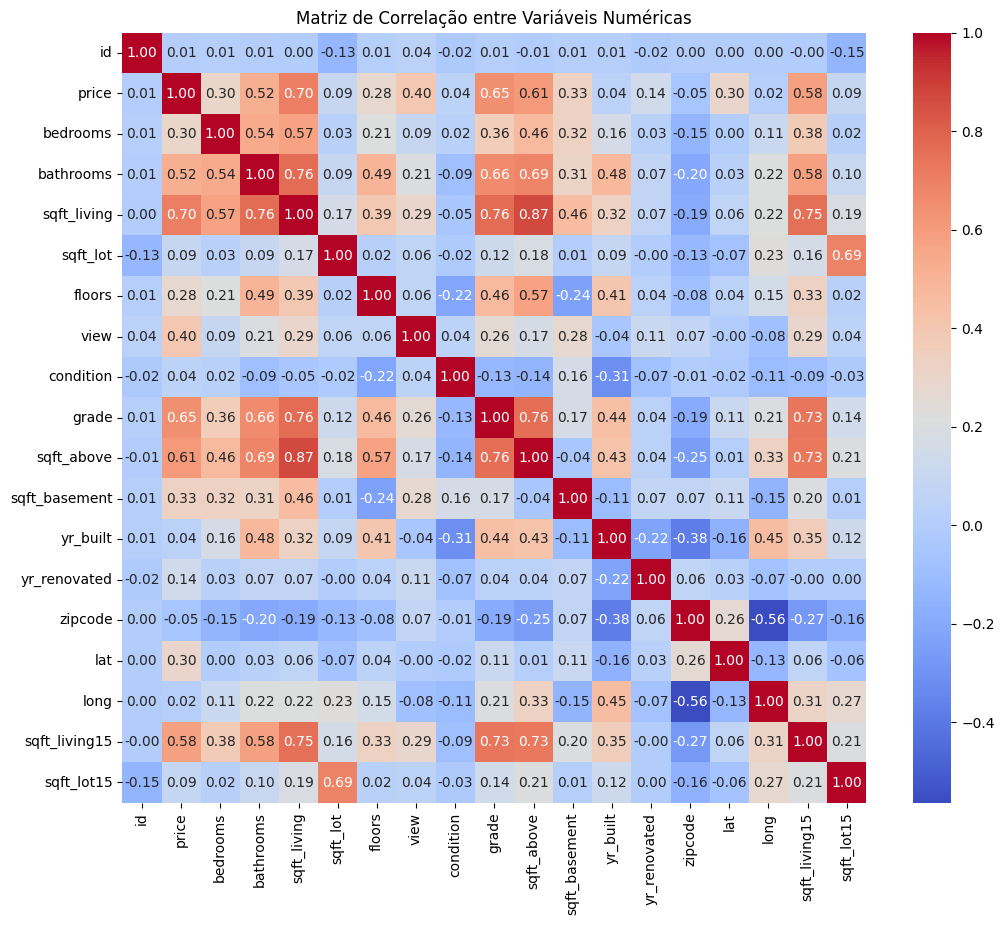

Correlação entre preço e número de quartos: 0.30
Correlação entre preço e número de quartos (sqft_living > 2000): 0.12
A correlação entre preço e número de quartos muda quando consideramos apenas casas com sqft_living > 2000.


In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar o arquivo CSV contendo os dados das casas
file_path = 'kc_house_data.csv'  # Caminho do arquivo CSV
dados = pd.read_csv(file_path)  # Lê o arquivo CSV e armazena os dados em um DataFrame

# 2. Converter a coluna 'date' para o formato de data
dados['date'] = pd.to_datetime(dados['date'])  # Converte a coluna 'date' para datetime

# 3. Extrair recursos numéricos para análise de correlação
# Selecionando apenas colunas numéricas do DataFrame
numerical_features = dados.select_dtypes(include=['number'])

# 4. Calcular a matriz de correlação usando apenas recursos numéricos
correlation_matrix = numerical_features.corr()  # Calcula a matriz de correlação

# 5. Exibir a matriz de correlação utilizando um heatmap
plt.figure(figsize=(12, 10))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')  # Cria um heatmap da matriz de correlação
plt.title('Matriz de Correlação entre Variáveis Numéricas')  # Adiciona título ao gráfico
plt.show()  # Mostra o gráfico gerado

# 6. Calcular a correlação entre preço e número de quartos
correlation_price_bedrooms = numerical_features['price'].corr(numerical_features['bedrooms'])  # Calcula a correlação
print(f'Correlação entre preço e número de quartos: {correlation_price_bedrooms:.2f}')  # Imprime a correlação calculada

# 7. Filtrar casas com área útil (sqft_living) maior que 2000 pés quadrados
filtered_houses = numerical_features[numerical_features['sqft_living'] > 2000]  # Aplica o filtro

# 8. Calcular a correlação entre preço e número de quartos para as casas filtradas
correlation_price_bedrooms_filtered = filtered_houses['price'].corr(filtered_houses['bedrooms'])  # Calcula a correlação
print(f'Correlação entre preço e número de quartos (sqft_living > 2000): {correlation_price_bedrooms_filtered:.2f}')  # Imprime a correlação filtrada

# 9. Comparar as correlações para determinar se há diferença
if correlation_price_bedrooms != correlation_price_bedrooms_filtered:  # Verifica se as correlações são diferentes
    print("A correlação entre preço e número de quartos muda quando consideramos apenas casas com sqft_living > 2000.")
else:
    print("A correlação entre preço e número de quartos se mantém a mesma ao considerar apenas casas com sqft_living > 2000.")

**2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?**


Correlação entre preço e área total da casa (sqft_living) considerando casas com pelo menos 2 banheiros: 0.71


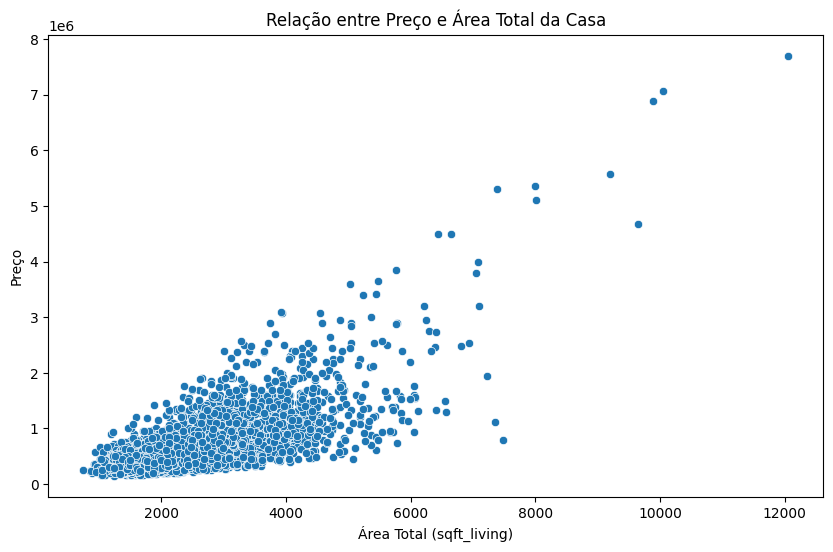

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar o arquivo CSV contendo os dados das casas
file_path = 'kc_house_data.csv'  # Caminho do arquivo CSV
dados = pd.read_csv(file_path)  # Lê o arquivo CSV e armazena os dados em um DataFrame

# 2. Converter a coluna 'date' para o formato de data
dados['date'] = pd.to_datetime(dados['date'])  # Converte a coluna 'date' para datetime

# 3. Extrair recursos numéricos para análise de correlação
numerical_features = dados.select_dtypes(include=['number'])  # Seleciona apenas colunas numéricas do DataFrame

# 4. Filtrar casas com pelo menos 2 banheiros
filtered_houses = numerical_features[numerical_features['bathrooms'] >= 2]  # Aplica o filtro

# 5. Calcular a correlação entre preço e área total da casa
correlation_price_sqft_living = filtered_houses['price'].corr(filtered_houses['sqft_living'])  # Calcula a correlação
print(f'Correlação entre preço e área total da casa (sqft_living) considerando casas com pelo menos 2 banheiros: {correlation_price_sqft_living:.2f}')  # Imprime a correlação calculada

# 6. Opcional: Visualizar a relação com um gráfico de dispersão
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.scatterplot(data=filtered_houses, x='sqft_living', y='price')  # Cria um gráfico de dispersão
plt.title('Relação entre Preço e Área Total da Casa')  # Adiciona título ao gráfico
plt.xlabel('Área Total (sqft_living)')  # Rotula o eixo x
plt.ylabel('Preço')  # Rotula o eixo y
plt.show()  # Mostra o gráfico gerado


**3. Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?**

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Correlação entre sqft_living e price para 0.0 banheiro(s): 0.92
Correlação entre sqft_living e price para 0.5 banheiro(s): nan
Correlação entre sqft_living e price para 0.75 banheiro(s): 0.36
Correlação entre sqft_living e price para 1.0 banheiro(s): 0.36
Correlação entre sqft_living e price para 1.25 banheiro(s): 0.17
Correlação entre sqft_living e price para 1.5 banheiro(s): 0.42
Correlação entre sqft_living e price para 1.75 banheiro(s): 0.45
Correlação entre sqft_living e price para 2.0 banheiro(s): 0.45
Correlação entre sqft_living e price para 2.25 banheiro(s): 0.60
Correlação entre sqft_living e price para 2.5 banheiro(s): 0.56
Correlação entre sqft_living e price para 2.75 banheiro(s): 0.52
Correlação entre sqft_living e price para 3.0 banheiro(s): 0.57
Correlação entre sqft_living e price para 3.25 banheiro(s): 0.54
Correlação entre sqft_living e price para 3.5 banheiro(s): 0.57
Correlação entre sqft_living e price para 3.75 banheiro(s): 0.47
Correlação entre sqft_living e pri

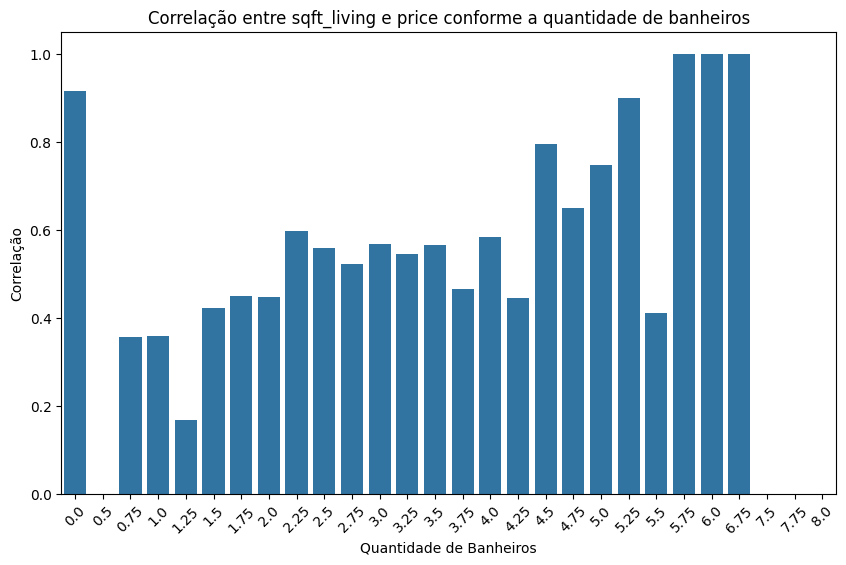

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar o arquivo CSV contendo os dados das casas
file_path = 'kc_house_data.csv'  # Caminho do arquivo CSV
dados = pd.read_csv(file_path)  # Lê o arquivo CSV e armazena os dados em um DataFrame

# 2. Converter a coluna 'date' para o formato de data
dados['date'] = pd.to_datetime(dados['date'])  # Converte a coluna 'date' para datetime

# 3. Extrair recursos numéricos para análise de correlação
numerical_features = dados.select_dtypes(include=['number'])  # Seleciona apenas colunas numéricas do DataFrame

# 4. Definir um intervalo de banheiros para análise
banheiros_unique = numerical_features['bathrooms'].unique()  # Obtém os valores únicos de banheiros
banheiros_unique = sorted(banheiros_unique)  # Ordena os valores únicos para fácil leitura

# 5. Criar um dicionário para armazenar as correlações
correlations = {}

# 6. Calcular a correlação entre sqft_living e price para cada número de banheiros
for bathrooms in banheiros_unique:
    # Filtra casas com o número atual de banheiros
    filtered_houses = numerical_features[numerical_features['bathrooms'] == bathrooms]

    # Verifica se há casas suficientes para o cálculo da correlação
    if len(filtered_houses) > 0:
        # Calcula a correlação entre sqft_living e price
        correlation = filtered_houses['price'].corr(filtered_houses['sqft_living'])
        # Armazena a correlação no dicionário
        correlations[bathrooms] = correlation

# 7. Exibir as correlações
for bathrooms, correlation in correlations.items():
    print(f'Correlação entre sqft_living e price para {bathrooms} banheiro(s): {correlation:.2f}')

# 8. Visualização das correlações em um gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.barplot(x=list(correlations.keys()), y=list(correlations.values()))  # Cria um gráfico de barras
plt.title('Correlação entre sqft_living e price conforme a quantidade de banheiros')  # Adiciona título
plt.xlabel('Quantidade de Banheiros')  # Rotula o eixo x
plt.ylabel('Correlação')  # Rotula o eixo y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor leitura
plt.show()  # Mostra o gráfico gerado


**4. Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?**

Correlação entre condição da casa e preço (sqft_living > 3000): 0.11


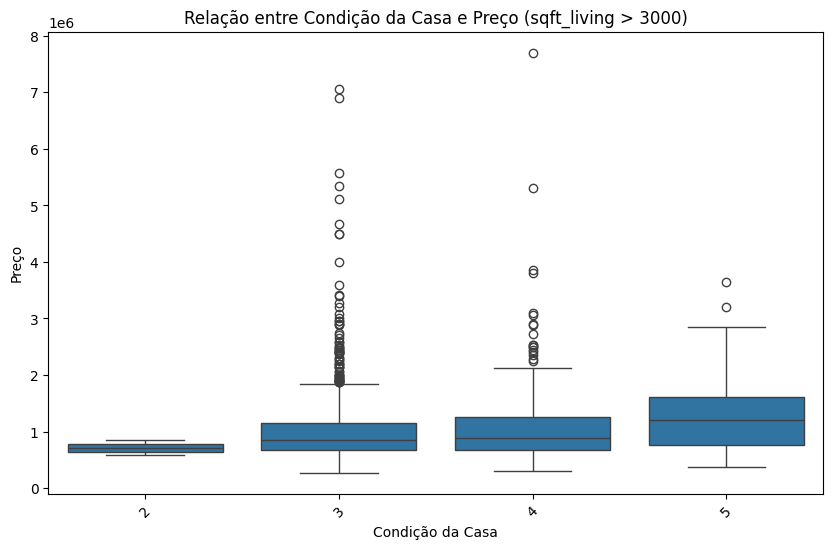

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar o arquivo CSV contendo os dados das casas
file_path = 'kc_house_data.csv'  # Caminho do arquivo CSV
dados = pd.read_csv(file_path)  # Lê o arquivo CSV e armazena os dados em um DataFrame

# 2. Converter a coluna 'date' para o formato de data
dados['date'] = pd.to_datetime(dados['date'])  # Converte a coluna 'date' para datetime

# 3. Filtrar casas com área total (sqft_living) superior a 3000 pés quadrados
filtered_houses = dados[dados['sqft_living'] > 3000]  # Aplica o filtro

# 4. Calcular a correlação entre a condição da casa e o preço
correlation_condition_price = filtered_houses['condition'].corr(filtered_houses['price'])  # Calcula a correlação
print(f'Correlação entre condição da casa e preço (sqft_living > 3000): {correlation_condition_price:.2f}')  # Imprime a correlação calculada

# 5. Visualizar a relação entre condição da casa e preço usando um boxplot
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.boxplot(x='condition', y='price', data=filtered_houses)  # Cria um boxplot da condição em relação ao preço
plt.title('Relação entre Condição da Casa e Preço (sqft_living > 3000)')  # Adiciona título
plt.xlabel('Condição da Casa')  # Rotula o eixo x
plt.ylabel('Preço')  # Rotula o eixo y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor leitura
plt.show()  # Mostra o gráfico gerado


**5. Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?**

Correlação entre latitude e preço (bedrooms >= 3): 0.31
Correlação entre longitude e preço (bedrooms >= 3): -0.01


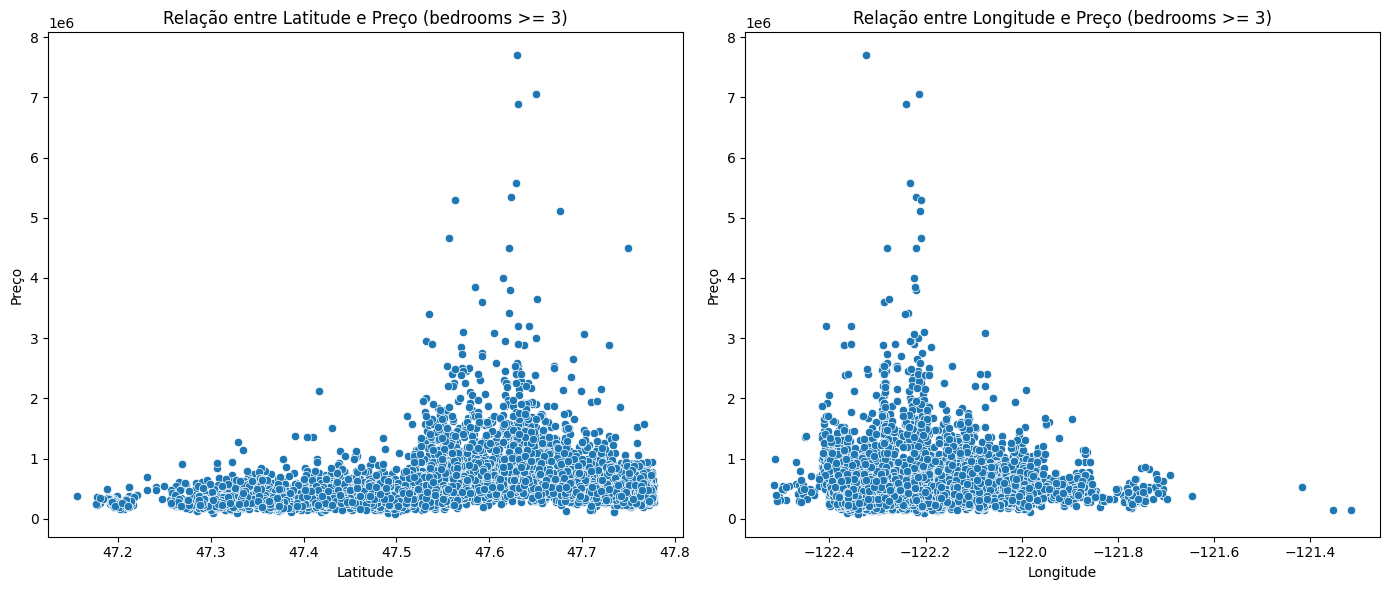

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar o arquivo CSV contendo os dados das casas
file_path = 'kc_house_data.csv'  # Caminho do arquivo CSV
dados = pd.read_csv(file_path)  # Lê o arquivo CSV e armazena os dados em um DataFrame

# 2. Converter a coluna 'date' para o formato de data
dados['date'] = pd.to_datetime(dados['date'])  # Converte a coluna 'date' para datetime

# 3. Filtrar casas com pelo menos três quartos
filtered_houses = dados[dados['bedrooms'] >= 3]  # Aplica o filtro para casas com 3 ou mais quartos

# 4. Calcular a correlação entre latitude, longitude e preço
correlation_lat_price = filtered_houses['lat'].corr(filtered_houses['price'])  # Correlação entre lat e price
correlation_long_price = filtered_houses['long'].corr(filtered_houses['price'])  # Correlação entre long e price

# 5. Imprimir as correlações calculadas
print(f'Correlação entre latitude e preço (bedrooms >= 3): {correlation_lat_price:.2f}')  # Imprime correlação lat e price
print(f'Correlação entre longitude e preço (bedrooms >= 3): {correlation_long_price:.2f}')  # Imprime correlação long e price

# 6. Visualizar a relação entre localização e preço usando um scatter plot
plt.figure(figsize=(14, 6))  # Define o tamanho da figura

# Scatter plot para latitude
plt.subplot(1, 2, 1)  # Cria o primeiro subplot
sns.scatterplot(x='lat', y='price', data=filtered_houses)  # Cria um scatter plot de lat vs price
plt.title('Relação entre Latitude e Preço (bedrooms >= 3)')  # Título do gráfico
plt.xlabel('Latitude')  # Rótulo do eixo x
plt.ylabel('Preço')  # Rótulo do eixo y

# Scatter plot para longitude
plt.subplot(1, 2, 2)  # Cria o segundo subplot
sns.scatterplot(x='long', y='price', data=filtered_houses)  # Cria um scatter plot de long vs price
plt.title('Relação entre Longitude e Preço (bedrooms >= 3)')  # Título do gráfico
plt.xlabel('Longitude')  # Rótulo do eixo x
plt.ylabel('Preço')  # Rótulo do eixo y

plt.tight_layout()  # Ajusta o layout
plt.show()  # Mostra os gráficos gerados


**6. Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


Estatística F: nan
Valor p: nan
Não há diferença significativa no preço entre casas com e sem vista para a água.


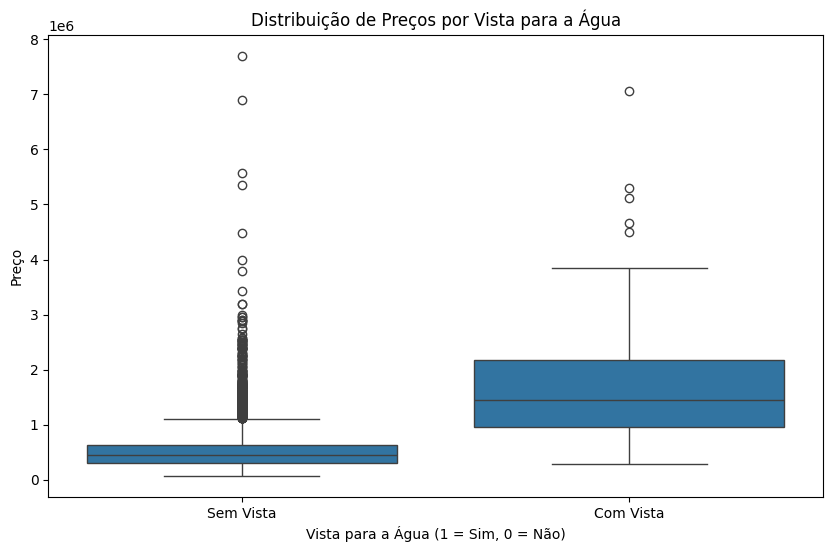

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Carregar o arquivo CSV contendo os dados das casas
file_path = 'kc_house_data.csv'  # Caminho do arquivo CSV
dados = pd.read_csv(file_path)  # Lê o arquivo CSV e armazena os dados em um DataFrame

# 2. Converter a coluna 'date' para o formato de data
dados['date'] = pd.to_datetime(dados['date'])  # Converte a coluna 'date' para datetime

# 3. Realizar ANOVA para verificar a relação entre 'waterfront' e 'price'
# Criar listas de preços com base na variável categórica 'waterfront'
price_waterfront = dados[dados['waterfront'] == 1]['price']  # Preços de casas com vista para a água
price_no_waterfront = dados[dados['waterfront'] == 0]['price']  # Preços de casas sem vista para a água

# 4. Realizar o teste ANOVA
f_statistic, p_value = stats.f_oneway(price_waterfront, price_no_waterfront)  # Calcula a estatística F e o valor p

# 5. Imprimir os resultados do ANOVA
print(f'Estatística F: {f_statistic:.2f}')  # Imprime a estatística F
print(f'Valor p: {p_value:.5f}')  # Imprime o valor p

# 6. Interpretação dos resultados
alpha = 0.05  # Nível de significância
if p_value < alpha:  # Verifica se o valor p é menor que o nível de significância
    print("Há uma diferença significativa no preço entre casas com e sem vista para a água.")
else:
    print("Não há diferença significativa no preço entre casas com e sem vista para a água.")

# 7. Visualização da distribuição de preços com base na variável 'waterfront'
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.boxplot(x='waterfront', y='price', data=dados)  # Cria um boxplot para visualizar a distribuição dos preços
plt.title('Distribuição de Preços por Vista para a Água')  # Título do gráfico
plt.xlabel('Vista para a Água (1 = Sim, 0 = Não)')  # Rótulo do eixo x
plt.ylabel('Preço')  # Rótulo do eixo y
plt.xticks(ticks=[0, 1], labels=['Sem Vista', 'Com Vista'])  # Define rótulos customizados para o eixo x
plt.show()  # Mostra o gráfico gerado


**7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.**

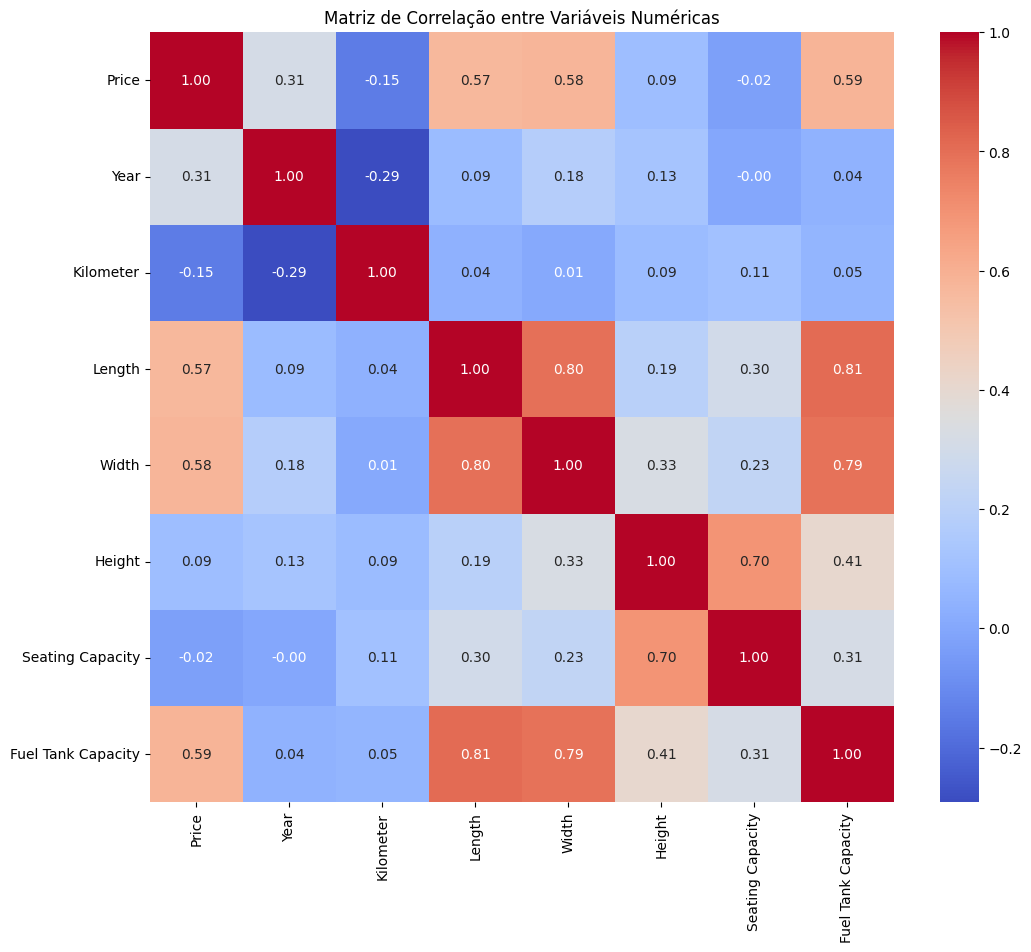

Exemplos de correlações:
Correlação positiva entre Price e Year: 0.30938086155386796
Correlação negativa entre Price e Kilometer: -0.14727615109321243
Correlação neutra entre Price e Seating Capacity: -0.02487942201193477


In [ ]:
# 1. Carregar o arquivo CSV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'car_price.csv'  # Caminho do arquivo CSV
car_data = pd.read_csv(file_path)  # Lê o arquivo CSV

# 2. Codificar e exibir a Matriz de correlação para as variáveis numéricas
# Selecionar apenas as colunas numéricas para o cálculo da correlação
numerical_data = car_data.select_dtypes(include=['number'])  # Seleciona colunas numéricas
correlation_matrix = numerical_data.corr()  # Calcula a matriz de correlação apenas para colunas numéricas
plt.figure(figsize=(12, 10))  # Tamanho da figura
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')  # Heatmap
plt.title('Matriz de Correlação entre Variáveis Numéricas')  # Título do gráfico
plt.show()  # Mostra o gráfico gerado

# Exemplos de correlações
print("Exemplos de correlações:")
print("Correlação positiva entre Price e Year:", correlation_matrix['Price']['Year'])
print("Correlação negativa entre Price e Kilometer:", correlation_matrix['Price']['Kilometer'])
# Certifique-se de que 'Seating Capacity' é uma coluna numérica antes de usá-la aqui
try:
    print("Correlação neutra entre Price e Seating Capacity:", correlation_matrix['Price']['Seating Capacity'])
except KeyError:
    print("A coluna 'Seating Capacity' não foi encontrada ou não é numérica.")

**8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.**

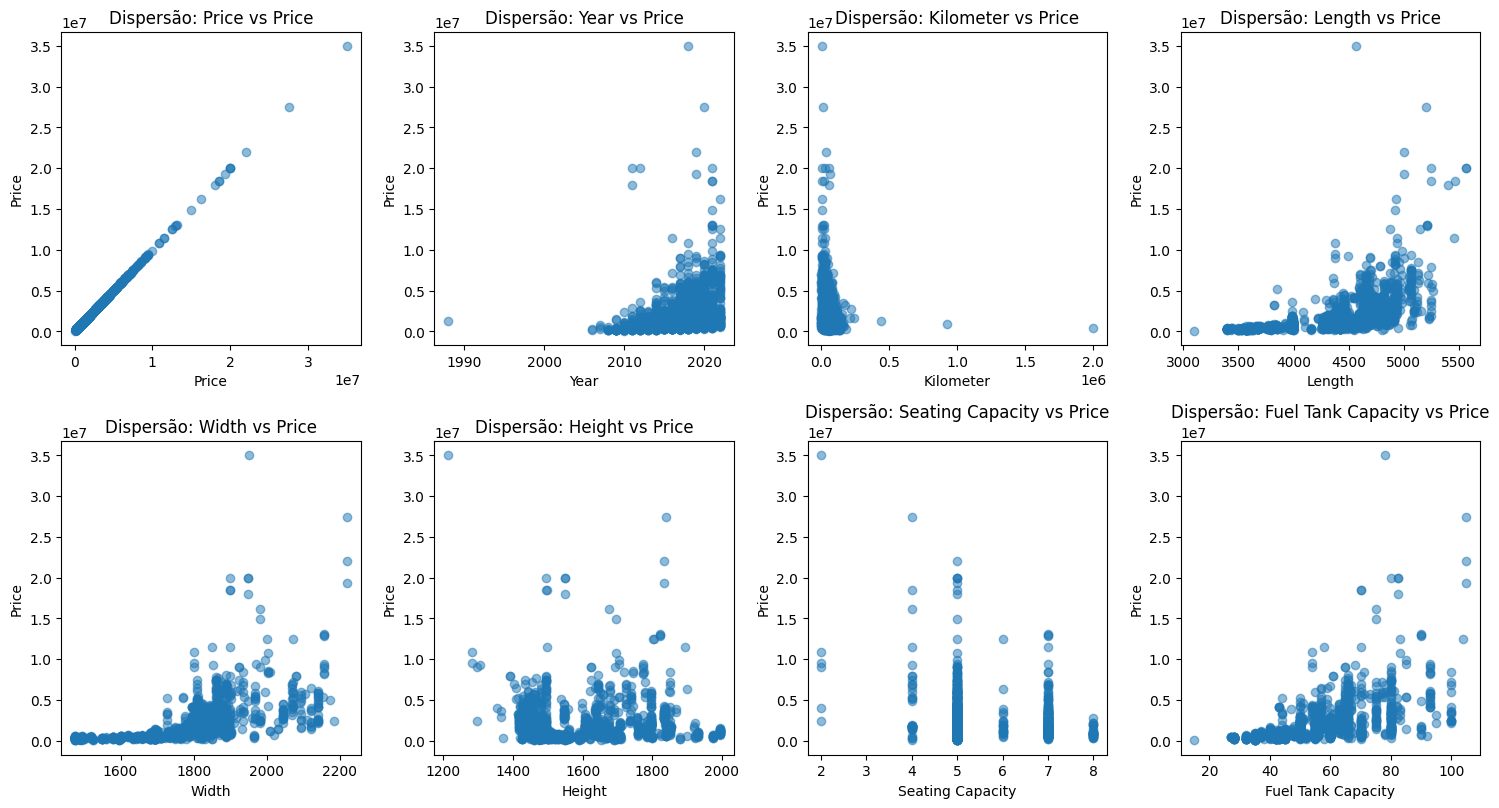

In [ ]:
# 1. Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price
numerical_features = car_data.select_dtypes(include=['number'])  # Selecionando colunas numéricas
plt.figure(figsize=(15, 12))  # Tamanho da figura
for i, column in enumerate(numerical_features.columns):
    plt.subplot(3, 4, i + 1)  # Cria subgráficos
    plt.scatter(car_data[column], car_data['Price'], alpha=0.5)  # Gráfico de dispersão
    plt.title(f'Dispersão: {column} vs Price')  # Título do gráfico
    plt.xlabel(column)  # Rótulo do eixo x
    plt.ylabel('Price')  # Rótulo do eixo y
plt.tight_layout()  # Ajusta o layout
plt.show()  # Mostra todos os gráficos gerados


**9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.**

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     198.1
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           7.48e-43
Time:                        21:45:11   Log-Likelihood:                -30115.
No. Observations:                1874   AIC:                         6.023e+04
Df Residuals:                    1872   BIC:                         6.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.806e+08   3.43e+07    -14.026      0.0

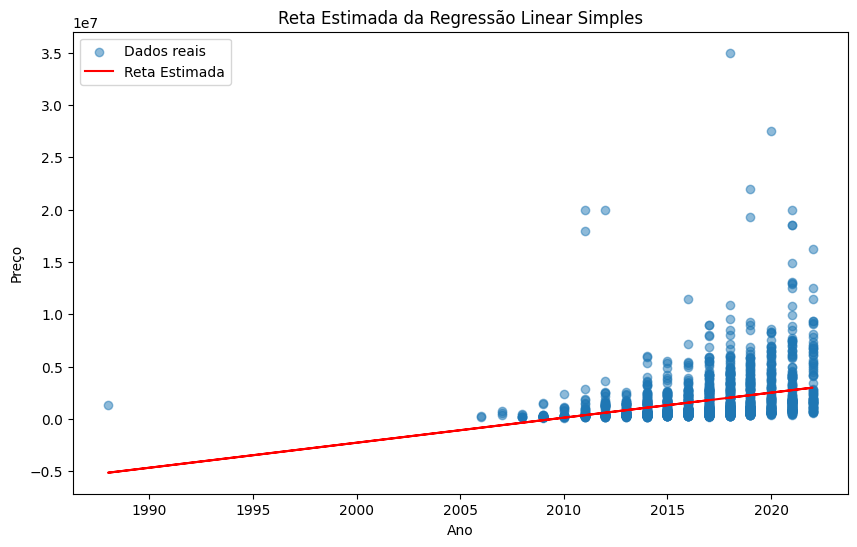

In [ ]:
import statsmodels.api as sm

# 1. Criar um modelo de Regressão Linear Simples
X = car_data[['Year']]  # Seleciona a variável independente
y = car_data['Price']  # Seleciona a variável dependente
X = sm.add_constant(X)  # Adiciona uma constante para o modelo
model_simple = sm.OLS(y, X).fit()  # Cria e ajusta o modelo de regressão
print(model_simple.summary())  # Exibe a Tabela de Regressão

# Plot da Reta Estimada
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.scatter(car_data['Year'], car_data['Price'], alpha=0.5, label='Dados reais')  # Gráfico de dispersão
plt.plot(car_data['Year'], model_simple.predict(X), color='red', label='Reta Estimada')  # Reta estimada
plt.title('Reta Estimada da Regressão Linear Simples')  # Título do gráfico
plt.xlabel('Ano')  # Rótulo do eixo x
plt.ylabel('Preço')  # Rótulo do eixo y
plt.legend()  # Adiciona a legenda
plt.show()  # Mostra o gráfico gerado


**10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples**

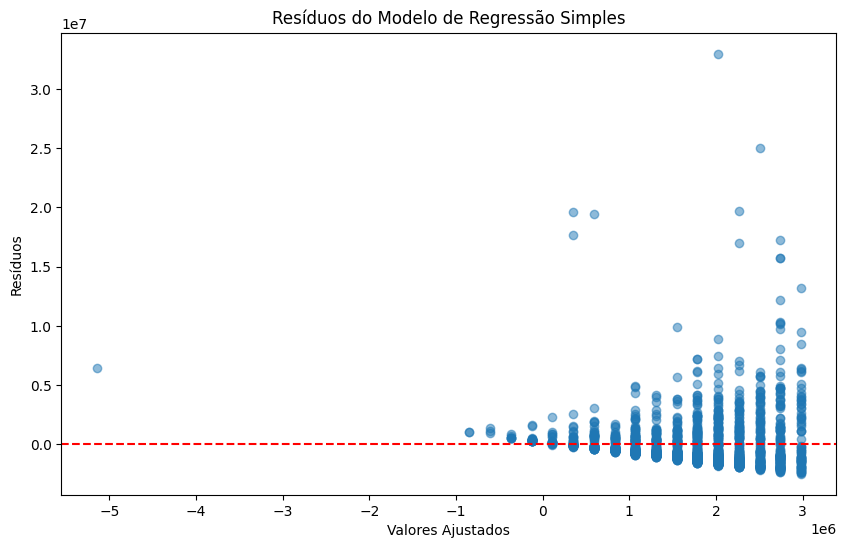

In [ ]:
# 1. Gráfico dos resíduos do modelo de Regressão Simples
residuals_simple = model_simple.resid  # Calcula os resíduos
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.scatter(model_simple.fittedvalues, residuals_simple, alpha=0.5)  # Gráfico de dispersão dos resíduos
plt.axhline(0, color='red', linestyle='--')  # Linha horizontal em y=0
plt.title('Resíduos do Modelo de Regressão Simples')  # Título do gráfico
plt.xlabel('Valores Ajustados')  # Rótulo do eixo x
plt.ylabel('Resíduos')  # Rótulo do eixo y
plt.show()  # Mostra o gráfico gerado


**11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.**

In [ ]:
print("Tamanho do DataFrame após remover nulos:", dados.shape)  # Exibe o tamanho do DataFrame


Tamanho do DataFrame após remover nulos: (0, 20)


In [ ]:
print("Conteúdo de X_multi:", X_multi.head())
print("Conteúdo de y_multi:", y_multi.head())


Conteúdo de X_multi: Empty DataFrame
Columns: [const, Make, Model, Year, Kilometer, Fuel Type, Transmission, Location, Color, Owner, Seller Type, Engine, Max Power, Max Torque, Drivetrain, Length, Width, Height, Seating Capacity, Fuel Tank Capacity]
Index: []
Conteúdo de y_multi: Series([], Name: Price, dtype: int64)


In [ ]:
print("Colunas disponíveis no DataFrame:", dados.columns.tolist())


Colunas disponíveis no DataFrame: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']


In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o arquivo CSV
file_path = 'car_price.csv'
dados = pd.read_csv(file_path)

# 2. Inspecionar as primeiras linhas do DataFrame
print(dados.head())  # Mostra as primeiras linhas do conjunto de dados

# 3. Verificar tipos de dados para identificar colunas categóricas
print(dados.dtypes)  # Exibe os tipos de dados

# 4. Verificar valores nulos
print(dados.isnull().sum())  # Mostra o número de valores nulos em cada coluna

# 5. Verificar se há colunas de tipo 'object' que deveriam ser numéricas
colunas_object = dados.select_dtypes(include=['object']).columns
print("Colunas com tipo 'object':", colunas_object.tolist())  # Exibe colunas com tipo 'object'

# 6. Converter colunas para numéricas, se possível
for col in colunas_object:
    dados[col] = pd.to_numeric(dados[col], errors='coerce')  # Tenta converter para numérico

# 7. Verificar novamente valores nulos após a conversão
print(dados.isnull().sum())  # Mostra o número de valores nulos em cada coluna após a conversão

# 8. Remover linhas com valores nulos
dados = dados.dropna()  # Remove linhas com qualquer valor NaN

# Verificando o tamanho do DataFrame
print("Tamanho do DataFrame após remover nulos:", dados.shape)

# 10. Definindo a variável dependente (y) e as variáveis independentes (X)
X_multi = dados_dummies.drop('Price', axis=1, errors='ignore')  # Ignora se a coluna não existir
y_multi = dados_dummies['Price']  # Mantém apenas a coluna de preço

# Verificando se X_multi e y_multi têm dados
print("Conteúdo de X_multi:", X_multi.head())
print("Conteúdo de y_multi:", y_multi.head())


            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length  Wi